# Classification: Data Exploration

In [1]:
import acquire
import prepare

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Titanic Data

In [333]:
df = acquire.get_titanic_data()
df = prepare.handle_missing_values(df)

In [334]:
df = df.assign(embark_town = df.embark_town.fillna('Other'))
df = df.assign(embarked = df.embarked.fillna('O'))

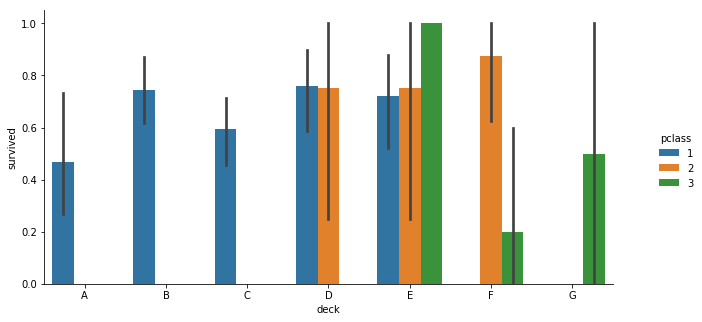

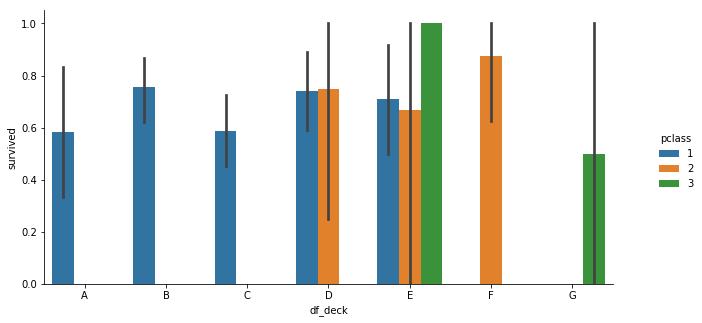

In [335]:
g = sns.catplot(x="deck", y="survived", hue="pclass", kind="bar", data=df, order=["A", "B", "C", "D", "E", "F", "G"])
g1 = sns.catplot(x="deck", y="survived", hue="pclass", kind="bar", data=df_deck,order=["A", "B", "C", "D", "E", "F", "G"])

g.fig.set_size_inches(10.5, 4.5)
g1.fig.set_size_inches(10.5, 4.5)
g1.set_axis_labels("df_deck")

In [336]:
df_deck = df.dropna()

In [337]:
df = df.drop(columns=['deck'])

In [338]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df.embarked)
df = df.assign(embarked_encode = encoder.transform(df.embarked))

In [339]:
### Drop na values

df = df.dropna()

In [340]:
### Test / Train Split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=.30, random_state=123, stratify=df[['survived']])
print(train.columns)
print(train.shape)
print(test.shape)

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')
(499, 13)
(215, 13)


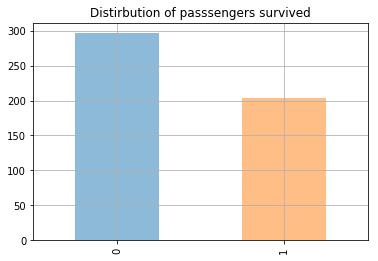

In [341]:
### Feature interactions & correlations

train.survived.value_counts().plot(kind='bar', alpha=.5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

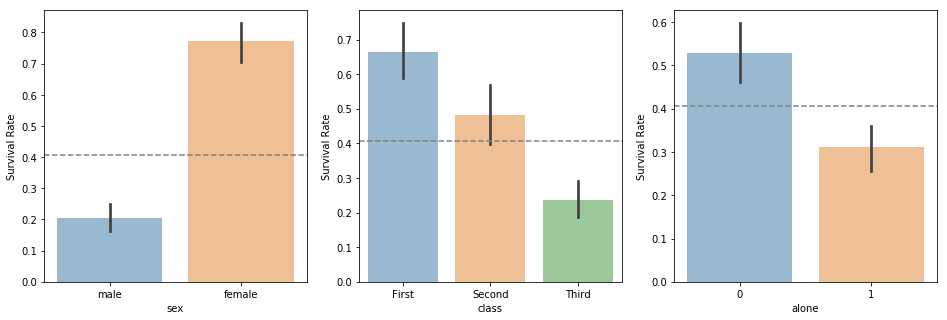

In [342]:
### Barplots with probabilities

features = ['sex', 'class', 'alone']

# '_' returns us a list of two things, but we only care about the axis
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

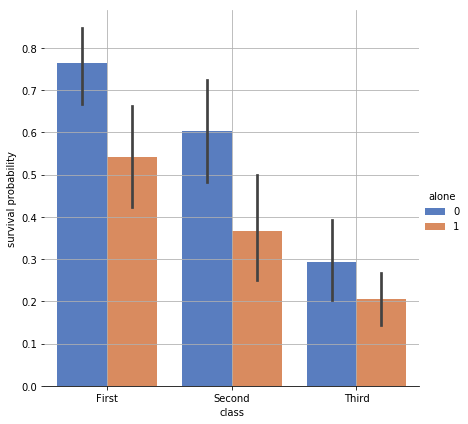

In [343]:
# Draw a nested barplot to show survival for alone and sex
g = sns.catplot(x="class", y="survived", hue="alone", data=train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
plt.grid(b = True , which = "major")

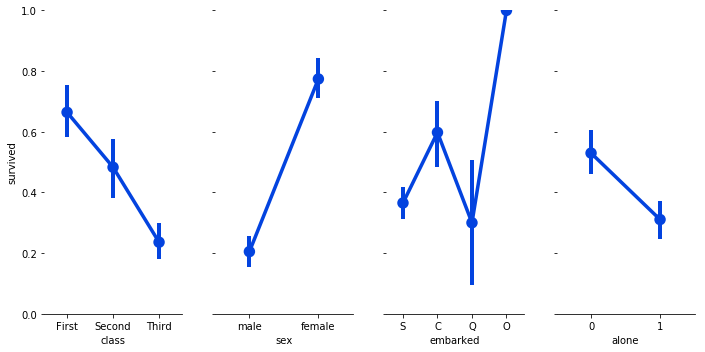

In [344]:
# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(train, y_vars="survived",
                 x_vars=["class", "sex", "embarked", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:blue")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

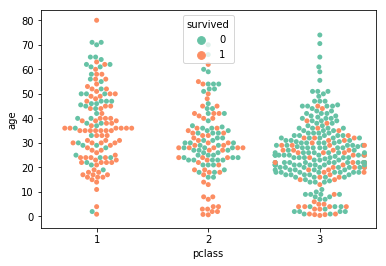

In [345]:
sns.swarmplot(x="pclass", y="age", data=train, hue="survived", palette="Set2")

Text(0.5, 0.98, 'Sex vs. Traveled Alone')

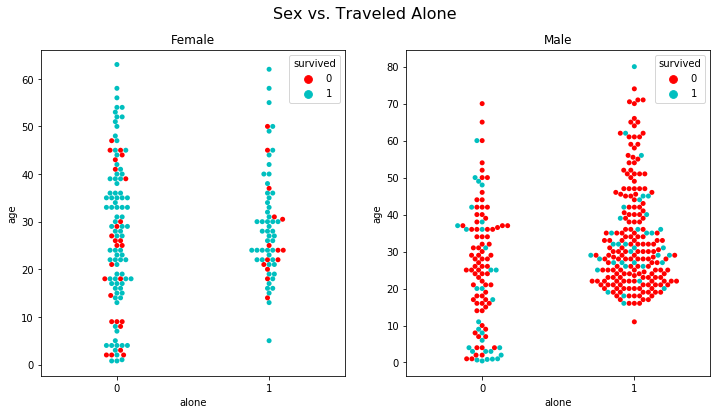

In [346]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="alone", y="age", hue="survived", 
              palette=["r", "c", "y"], ax=ax[0], data=train[train["sex"]=='female'])
ax[0].set_title('Female')
sns.swarmplot(x="alone", y="age", hue="survived", 
              palette=["r", "c", "y"], ax=ax[1], data=train[train['sex']=='male'])
ax[1].set_title('Male')

_.suptitle('Sex vs. Traveled Alone', fontsize=16)

## Iris Data

In [347]:
df_iris = acquire.get_iris_data()
df_iris = prepare.prep_iris(df_iris)

1. Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [348]:
train, test = train_test_split(df_iris, test_size=.30, random_state=123)

In [349]:
train.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

2. Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. What are your takeaways from this visualization?

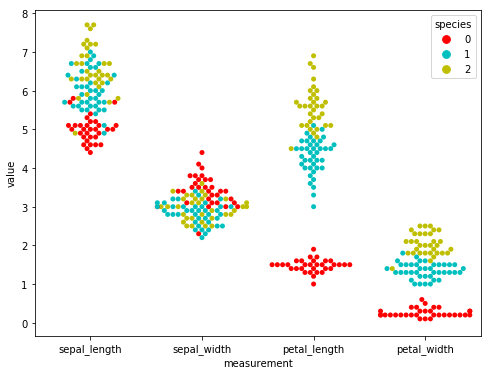

In [350]:
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(train, "species", var_name="measurement")

plt.figure(figsize=(8,6))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)


3. Create 4 subplots (2 rows x 2 columns) of scatterplots
    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length

Make your figure size 14 x 8. What are your takeaways?

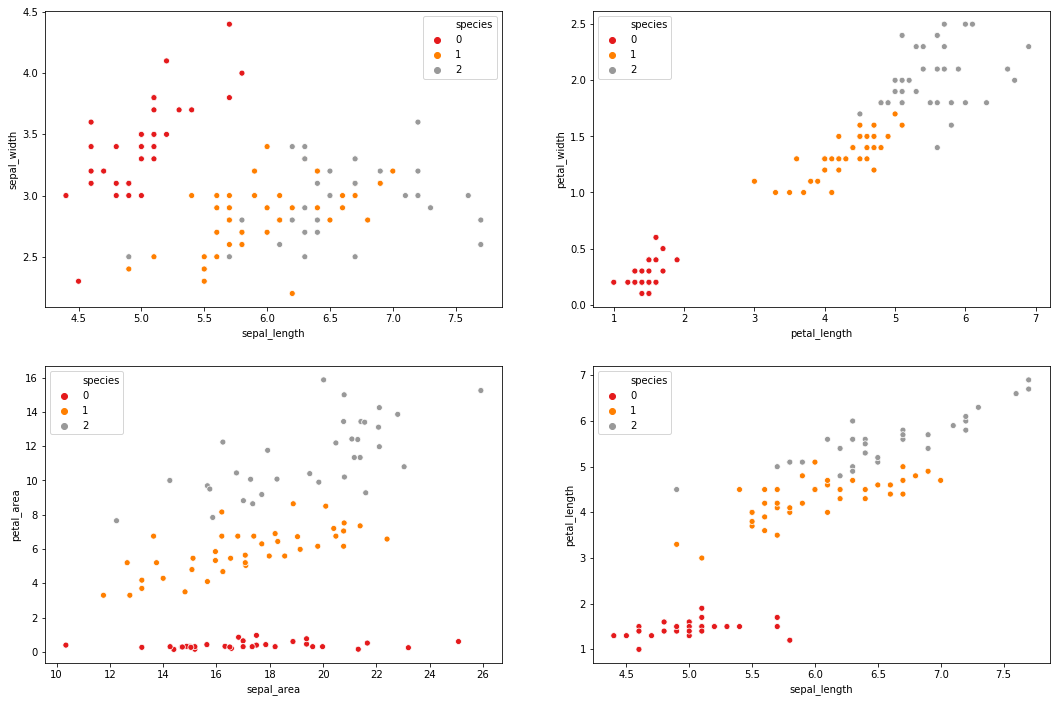

In [363]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

sepal_area = (train.sepal_length * train.sepal_width)
petal_area = (train.petal_length * train.petal_width)

sns.scatterplot(x="sepal_length", y="sepal_width", ax=ax[0,0], data=train, hue=train.species, palette="Set1")
sns.scatterplot(x="petal_length", y="petal_width", ax=ax[0,1], data=train, hue=train.species, palette="Set1")
sns.scatterplot(x=sepal_area, y=petal_area, ax=ax[1,0], data=train, hue=train.species, palette="Set1")
ax[1,0].set_xlabel('sepal_area')
ax[1,0].set_ylabel('petal_area')
sns.scatterplot(x="sepal_length", y="petal_length", ax=ax[1,1], data=train, hue=train.species, palette="Set1")


4. Create a heatmap of each variable layering correlation coefficient on top.

In [352]:
train.corr().values[::1]

array([[ 1.        ,  0.77057931, -0.43563359,  0.94343273,  0.95054164],
       [ 0.77057931,  1.        , -0.15940972,  0.87322676,  0.80432989],
       [-0.43563359, -0.15940972,  1.        , -0.44285362, -0.36700565],
       [ 0.94343273,  0.87322676, -0.44285362,  1.        ,  0.95867331],
       [ 0.95054164,  0.80432989, -0.36700565,  0.95867331,  1.        ]])

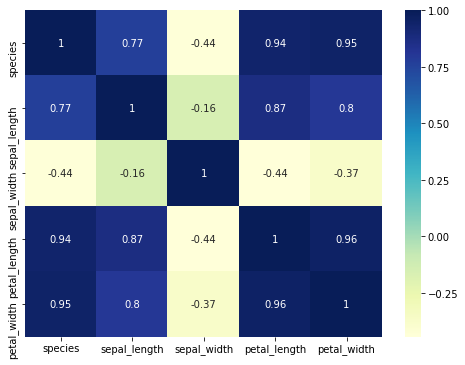

In [364]:
plt.figure(figsize=(8,6))

sns.heatmap(train.corr(), annot=True, cmap="YlGnBu")

5. Create a scatter matrix visualizing the interaction of each variable

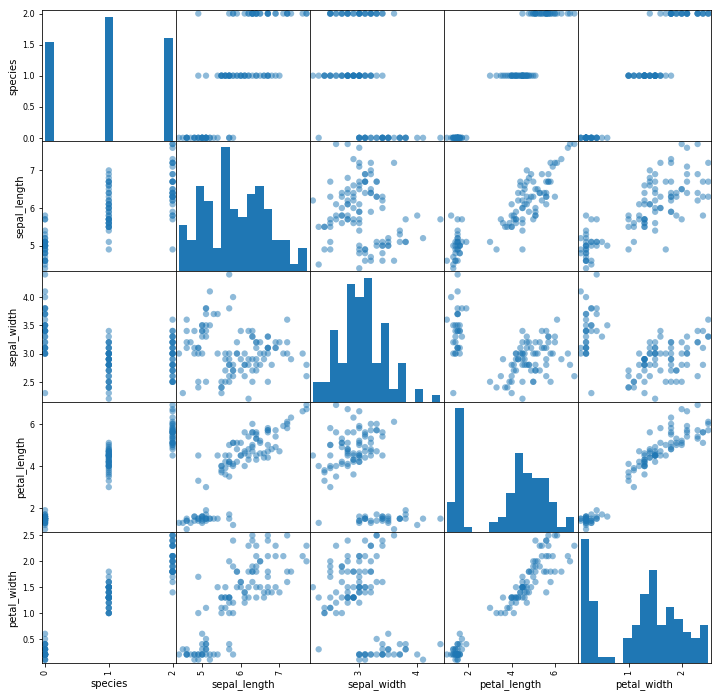

In [361]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train[['species', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(12,12), cmap=cmap)

6. Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this:

    - must include null hypothesis, alternative hyp, t-test, results, summary
    - _H0_: the difference in sepal length between virginica and versicolor is insignificant.  
    - _Ha_: the difference in sepal length between virginica and versicolor is substantial.    
    - We will test if the sepal length of virginica is significantly different than that of the versicolor.    
    - If there is difference, then variable sepal_length is a good choice to keep as a feature.
    - We can use a t-test here, as sepal_length is somwhat normally distributed.

In [355]:
### _H0_: the diffence between the two is insignificant

In [369]:
import scipy as sp 
import numpy as np

### _Ha_: the difference between sepal length between virginica and versicolor

sp.stats.ttest_ind(
    train[train.species == 0].sepal_length,
    train[train.species == 1].sepal_length)

Ttest_indResult(statistic=-9.608217166829586, pvalue=2.0489464845602504e-14)

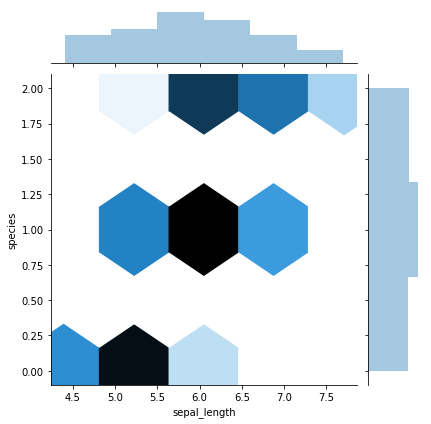

In [366]:
sns.jointplot("sepal_length", "species", data=train, kind="hex")

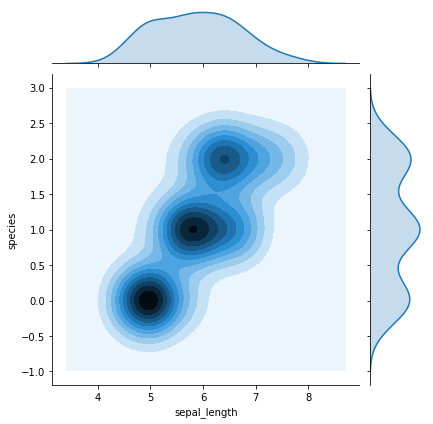

In [373]:
sns.jointplot("sepal_length", "species", data=train, kind="kde")